# Boxplot of ice thickness observations and gridded model output

In [73]:
#Ben Pelto June 20 2019

import seaborn as sns
import pandas as pd
import pickle 
# from PIL import Image
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [74]:
# path = '/home/pelto/'

path = '/home/pelto/GIS/GPR/ComparisonData/'
path2 = '/home/pelto/oggm_runs/products_opt/'
data = pd.read_csv(path + 'all_comp_final.csv')
# dc =  xr.open_dataset(path2 + 'Conrad/' + 'Conrad_optimized.nc')
# nor_h_25 = Image.open(path + 'nordic_h_25m_gpr_locs_srtm_corr.tif')
# nor_gpr_25 = Image.open(path + 'nordic_gpr_final_25m_test.tif')
# nor_c_200 = Image.open(path + 'nordic_c_200m_gpr_locs_srtm_corr.tif')

In [75]:
data[data.glacier=='Illec.']#:5]

,E,N,Z,glacier,source,resolution
10427,470013.146,5678216.314,22.693359,Illec.,Clarke,200
10428,470013.146,5678016.314,33.901611,Illec.,Clarke,200
10429,470213.146,5678016.314,53.148926,Illec.,Clarke,200
10430,470213.146,5677816.314,54.656494,Illec.,Clarke,200
10431,470413.146,5677816.314,77.686768,Illec.,Clarke,200
10432,470413.146,5677616.314,64.835205,Illec.,Clarke,200
10433,470613.146,5677616.314,90.931396,Illec.,Clarke,200
10434,470413.146,5677416.314,54.448486,Illec.,Clarke,200
10435,470613.146,5677416.314,79.552490,Illec.,Clarke,200
10436,470813.146,5677416.314,98.181885,Illec.,Clarke,200


In [76]:
# np.array(dc.distributed_thickness)

# BEN!!!! (1) I love you lots (2) look at my code below!
It seems like you don't have an optimized.nc file for each glacier yet but once you do this will loop through the glaciers, open the array, pull out each distributed thickness (each value in that array) and put it in your table along with the glacier name and source (which I am calling optimized). You can do this for your other dataset you want to add as well, just change the source name! 

P.S. Miss you already 
P.P.S text/call me if you have questions!

In [77]:
glacier= ["Zillmer", "Nordic","Illecillewaet", "Washmawapta", "Haig", "Conrad", "Kokanee"]
glacier_abb = ["Zillmer", "Nordic","Illec.", "W. Wash.", "Haig", "Conrad", "Kokanee"]
count = 0
for G in glacier: 
    #open file by glacier name
    infile = open(path2 + '%s/'%G + '%s_optimized_gprlocs.pkl'%G,'rb')
    dc = pickle.load(infile)
    
    
    #remove distriubuted thickness array
    K=np.array(dc)#.distributed_thickness)

    #find where there are values in this array
    IDX= np.ma.where(K > 0, )

    
    # pull out each value and save it in the dataframe called data
    for i in np.arange(0,len(IDX[0])):
        V=K[IDX[0][i]][IDX[1][i]]
    
        data=data.append({'Z': V,'glacier':glacier_abb[count],'source':'optimized'},ignore_index=True)
    count+=1

/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


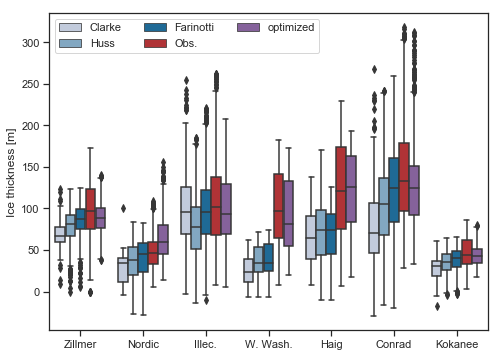

In [78]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(7, 5)) #(10, 8))

# sns.set(style="ticks", font='arial', fontsize=8)#, font_scale=1.5)

colors = ['#bdc9e1', '#74a9cf', '#0570b0', '#cb181d', '#8856a7'] #8c96c6

ax = sns.boxplot(x=data.glacier, y=data.Z, hue=data.source, palette=colors, hue_order= ['Clarke', 'Huss', 
            'Farinotti', 'Obs.', 'optimized'], order=["Zillmer", "Nordic","Illec.", "W. Wash.", "Haig", "Conrad", "Kokanee"], saturation=0.7)

ax.legend(ncol = 3, loc = 'best') 
ax.set(xlabel='', ylabel='Ice thickness [m]')
plt.tight_layout()
plt.savefig('/home/pelto/Desktop/ice_thick/' + 'ice_thickness_boxplot_opt.png', dpi=300)
plt.show()